<a href="https://colab.research.google.com/github/pmlaleoro/LSTM-Time-Series-Forecasting/blob/main/LSTM_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **"LSTM Time Series Forecasting using International Airline Passengers Dataset"**

This system performs time series forecasting on the International Airline Passengers Dataset using an LSTM (Long Short-Term Memory) neural network built with TensorFlow Keras. Its goal is to analyze historical monthly passenger data and predict future values by learning patterns such as trends and seasonality.

Implemented by:


*   Pamela Angel Leoro
*   Jade Carlo Pamati-an
*   Cesar Kenneth Ledda
*   Prinz Angelo Dela Paz
*   Sean Martin Galleto







---



**Step 1. Importing Required Libraries**

In this step, we import all the Python libraries needed for the project. We use pandas and numpy for handling the dataset, matplotlib for plotting graphs, and tensorflow.keras for building the LSTM model. These libraries provide all the essential tools for loading data, preparing sequences, training the neural network, and visualizing results.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


**Step 2. Load the Internationa Airline Passengers Dataset**

Here we read the dataset from an online CSV file containing monthly airline passenger numbers from 1949 to 1960. Using pandas.read_csv(), we load the data into a DataFrame and parse the ‘Month’ column as dates. This step prepares the data so we can analyze it, plot it, and later transform it into sequences needed by the LSTM model.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Step 3. Visualize the Time Series Data**

To understand the data better, we first plot it as a line graph. Visualization helps us see important patterns such as trends and seasonality which is the number of passengers increases over time and also shows repeating yearly cycles. Recognizing these patterns helps us understand why an LSTM (a memory-based neural network) is appropriate for this forecasting task.

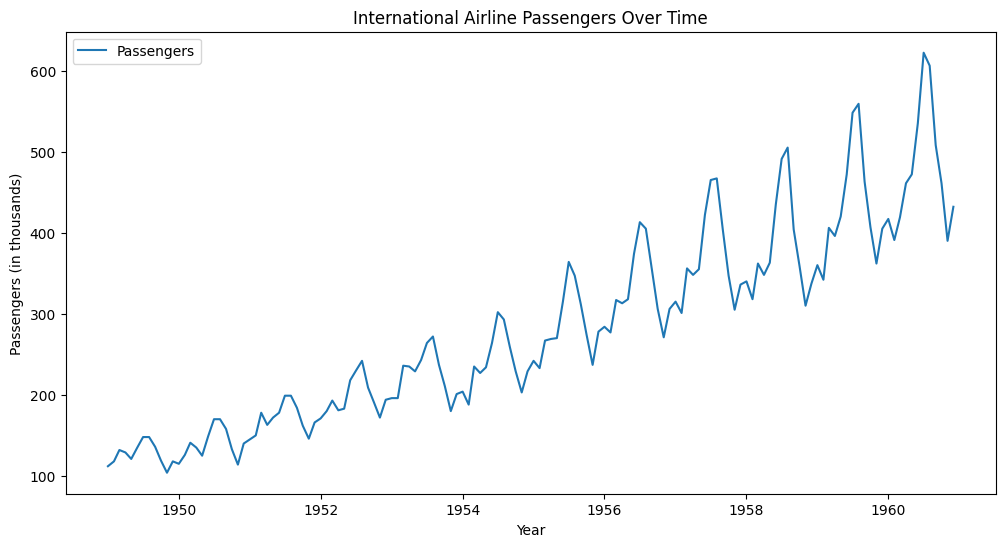

In [3]:
plt.figure(figsize=(12,6))
plt.plot(df, label="Passengers")
plt.title("International Airline Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Passengers (in thousands)")
plt.legend()
plt.show()


**Step 4. Normalize and Prepare the Data for LSTM**

LSTM models work best when input values are scaled to a smaller range, usually 0 to 1. We apply MinMaxScaler to normalize the passenger data. After scaling, we convert the series into input-output pairs using a sliding window (for example, using 12 months to predict the next month). This transformation is required because LSTMs expect sequences of numbers rather than single values.

In [4]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values)

def create_sequences(data, window_size=12):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_sequences(scaled_data, window_size)

X = X.reshape((X.shape[0], X.shape[1], 1))


**Step 5. Split the Dataset Into Training and Testing Sets**

To evaluate the performance of our model, we divide the prepared dataset into two parts. The training set is used to teach the LSTM how patterns behave, while the testing set is used to check how well the model performs on unseen data. This split ensures that our model can generalize and not simply memorize the training data.

In [5]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


**Step 6. Built the LSTM Model Using TensorFlow Keras**

In this step, we define a sequential LSTM model consisting of an LSTM layer followed by a Dense layer. The LSTM layer learns long-term time dependencies from the sequence inputs, while the Dense layer outputs the predicted passenger number for the next month. We compile the model using the Adam optimizer and mean squared error (MSE) loss function, which is standard for regression problems.

In [6]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Step 7. Train the LSTM Model

Training involves feeding the training sequence data into the model and allowing it to adjust its internal weights to minimize prediction error. We specify the number of epochs (training cycles) and batch size.

In [7]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.1191
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0853
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0539
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0253
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0129
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0131
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0097
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0064
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0081
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0076
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0055
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0066
Epoch 13/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0062
Epoch 14/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0071
Epoch 15/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0061 
Epoch 16/50
7/7 ━━━━━━━━━━━━━━━━━━

**Step 8. Generate Predictions and Inverse Transform Them**

Once the model is trained, we use it to predict the values of the test dataset. Since the model outputs normalized values, we apply an inverse transformation using the MinMaxScaler to convert the predicted values back into passenger numbers. This step ensures that predictions are meaningful and comparable to the real-world dataset.

In [8]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 789ms/step


**Step 9. Visualize Actual vs. Predicted Results**

Finally, we plot both actual and predicted passenger counts on the same graph. This comparison gives us a clear view of how accurate our model is. If predictions closely follow the shape of the actual data, the model is performing well.

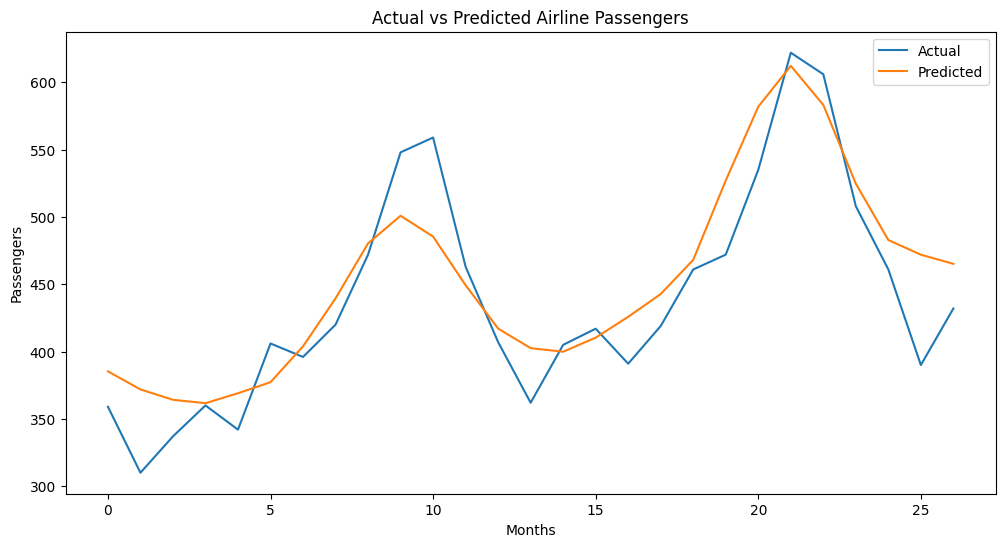

In [9]:
plt.figure(figsize=(12,6))
plt.plot(y_test_actual, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title("Actual vs Predicted Airline Passengers")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.legend()
plt.show()


**Conclusion**

Overall, the graph above compares the actual and predicted monthly airline passenger numbers using the LSTM model. The predicted curve follows the general pattern of the actual data, showing that the model successfully learned the trend and seasonal behavior of the dataset. The LSTM captures the yearly rise and fall of passenger counts especially during the middle and end of each cycle where peaks occur. However, we can also see some differences: **the model tends to smooth out sharp increases and decreases, meaning it does not perfectly match sudden spikes or dips in the real data.** This is a common behavior of LSTM models on small datasets wherein they perform well on long-term patterns but struggle with highly fluctuating values. Despite these small variations, the predictions remain close to the real values showing that the model is effective and reasonably accurate for forecasting future passenger numbers.